In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = {'Age':[12,13,23,23,45,560,76,45,21,56,43,76,78,24,700],
        'Weight':[40,45,540,53,52,53,56,67,86,56,77,67,86,75,800],
        'Height':[150,160,159,169,170,1800,178,167,166,177,1880,160,170,160,150],
       'Col_test':[1,1,1,1,1,1,1,0,1,1,1,1,1,1,1]}

df = pd.DataFrame(data)
df_copy = df.copy()
df

,Age,Weight,Height,Col_test
0,12,40,150,1
1,13,45,160,1
2,23,540,159,1
3,23,53,169,1
4,45,52,170,1
5,560,53,1800,1
6,76,56,178,1
7,45,67,167,0
8,21,86,166,1
9,56,56,177,1


In [3]:
#Explore Descsriptive statistics for dataFrame analysis min , max , mean and quantiles .... to take proof that outliers present.

df_copy.describe()

,Age,Weight,Height,Col_test
count,15.000000,15.000000,15.000000,15.000000
mean,119.666667,143.533333,387.733333,0.933333
std,210.077763,219.758916,589.869413,0.258199
min,12.000000,40.000000,150.000000,0.000000
25%,23.000000,53.000000,160.000000,1.000000
50%,45.000000,67.000000,167.000000,1.000000
75%,76.000000,81.500000,173.500000,1.000000
max,700.000000,800.000000,1880.000000,1.000000


/data/spark/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/data/spark/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/data/spark/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

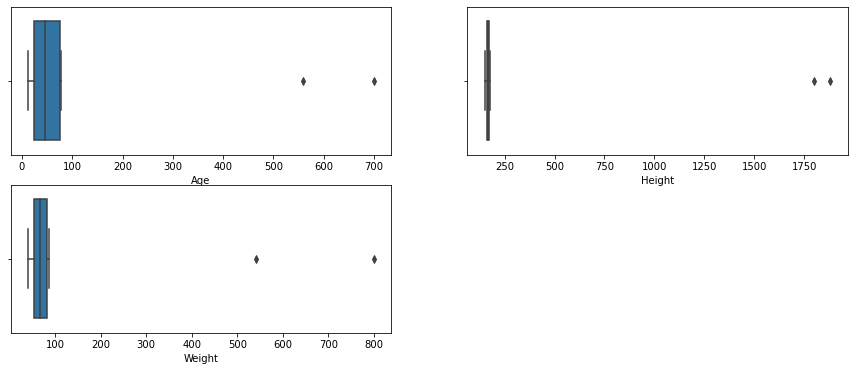

In [4]:
#Visualize outliers

plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
sns.boxplot(df_copy['Age'])
plt.subplot(2,2,2)
sns.boxplot(df_copy['Height'])
plt.subplot(2,2,3)
sns.boxplot(df_copy['Weight'])

In [5]:
# Suppose a certain column having similiar values, hence that column is nothing to do with predicts. we check via calc. variance
# lower the variance useless that column
np.var(df_copy)

Age          41190.488889
Weight       45074.382222
Height      324749.528889
Col_test         0.062222
dtype: float64

In [6]:
df['Col_test'].value_counts()     

1    14
0     1
Name: Col_test, dtype: int64

In [7]:
#simple Drop this col_test
df.drop('Col_test', axis =1 ,inplace =True)


In [8]:
# LocalOutlierFactor used neighbors distance to hit outliers

loc_out_fac = LocalOutlierFactor(n_neighbors=4)
masked = loc_out_fac.fit_predict(df_copy)
df_copy['Outlier_LOF_-1'] = masked

In [9]:
df_copy

,Age,Weight,Height,Col_test,Outlier_LOF_-1
0,12,40,150,1,1
1,13,45,160,1,1
2,23,540,159,1,-1
3,23,53,169,1,1
4,45,52,170,1,1
5,560,53,1800,1,-1
6,76,56,178,1,1
7,45,67,167,0,1
8,21,86,166,1,1
9,56,56,177,1,1


In [10]:
# Z-score is standard mean and Std. Dev (actual - mean/ Std dev)  "Threshold = 2" represent upto 2 Std. Dev  (mu +- 2sigma)

z =np.abs(stats.zscore(df))
thres = 2
print(z)
print(np.where(z>thres))

[[0.53049683 0.48765795 0.41717264]
 [0.52556962 0.46410718 0.39962471]
 [0.47629746 1.86741906 0.40137951]
 [0.47629746 0.42642594 0.38383158]
 [0.36789873 0.4311361  0.38207679]
 [2.16961707 0.42642594 2.47823476]
 [0.21515506 0.41229548 0.36803845]
 [0.36789873 0.36048379 0.38734117]
 [0.4861519  0.27099086 0.38909596]
 [0.31369936 0.41229548 0.36979324]
 [0.37775316 0.31338225 2.61861815]
 [0.21515506 0.36048379 0.39962471]
 [0.20530063 0.27099086 0.38207679]
 [0.47137025 0.32280256 0.39962471]
 [2.85942719 3.09205911 0.41717264]]
(array([ 5,  5, 10, 14, 14]), array([0, 2, 2, 0, 1]))


In [11]:
indexs = np.unique(np.where(z>thres)[0])
df_copy['Outlier_zscore_with_-1'] = 1
df_copy.loc[indexs,'Outlier_zscore_with_-1'] = -1

In [12]:
df_copy

,Age,Weight,Height,Col_test,Outlier_LOF_-1,Outlier_zscore_with_-1
0,12,40,150,1,1,1
1,13,45,160,1,1,1
2,23,540,159,1,-1,1
3,23,53,169,1,1,1
4,45,52,170,1,1,1
5,560,53,1800,1,-1,-1
6,76,56,178,1,1,1
7,45,67,167,0,1,1
8,21,86,166,1,1,1
9,56,56,177,1,1,1


In [17]:
# IQR inter-quantile range
"""
In the above formula as according to statistics, the 0.5 scale-up of 
IQR (new_IQR = IQR + 0.5*IQR) is taken, to consider all the data between 2.7 standard deviations in the Gaussian Distribution.
"""
def IQR_list(col):
    indexs = []
    df = pd.DataFrame()
    for X in col:
        Q1 = np.percentile(df_copy[X], 25, method = 'midpoint')
        Q3 = np.percentile(df_copy[X], 75, method = 'midpoint')
        IQR = Q3 - Q1
        
        col_name = X+'_UPPER'
        # Above Upper bound
        upper = df_copy[X] >= (Q3+1.5*IQR)
        df[col_name] = upper
        indexs.append(list(np.where(upper)[0]))
        
        col_name = X+'_LOWER'
        # Below Lower bound
        lower = df_copy[X] <= (Q1-1.5*IQR)
        df[col_name] = lower
        indexs.append(list(np.where(lower)[0]))
    
    return indexs,df

list_IQR_index,df = IQR_list(['Age', 'Height', 'Weight'])
resultList = [element for X in list_IQR_index for element in X]

list_IQR_index = list(np.unique(resultList))
print(df)

df_copy['Outlier_IQR_with_-1'] = 1
df_copy.loc[list_IQR_index,'Outlier_IQR_with_-1'] = -1

    Age_UPPER  Age_LOWER  Height_UPPER  Height_LOWER  Weight_UPPER  \
0       False      False         False         False         False   
1       False      False         False         False         False   
2       False      False         False         False          True   
3       False      False         False         False         False   
4       False      False         False         False         False   
5        True      False          True         False         False   
6       False      False         False         False         False   
7       False      False         False         False         False   
8       False      False         False         False         False   
9       False      False         False         False         False   
10      False      False          True         False         False   
11      False      False         False         False         False   
12      False      False         False         False         False   
13      False      F

In [18]:
df_copy

,Age,Weight,Height,Col_test,Outlier_LOF_-1,Outlier_zscore_with_-1,Outlier_IQR_with_-1
0,12,40,150,1,1,1,1
1,13,45,160,1,1,1,1
2,23,540,159,1,-1,1,-1
3,23,53,169,1,1,1,1
4,45,52,170,1,1,1,1
5,560,53,1800,1,-1,-1,-1
6,76,56,178,1,1,1,1
7,45,67,167,0,1,1,1
8,21,86,166,1,1,1,1
9,56,56,177,1,1,1,1
